# Emulation running from notebook

In [98]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import some library pieces

In [99]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

plot_defaults()

In [100]:
# six degrees of freedom search
from src.models.emu6d import SixDOFSearch

## Run 6D with fake function to generate hold out set

In [101]:
# Two degrees of freedom search [bearing and position]
from src.models.emulation import EmulationSmash

In [125]:
## Let's see if the six degrees of freedom search works
tf  = SixDOFSearch(dryrun=True, path="FakeTest", test_data_path="None", seed=0)
tf.run_initial(samples=1000)
tf.setup_active()
tf.run_active(1)
tf.save_initial_data()
# tf.save_real()


Sweep, dryrun=True: 100%|██████████| 1000/1000 [00:00<00:00, 5329.92it/s]
 /Users/simon/new-orleans/env/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [126]:
tf  = SixDOFSearch(dryrun=True, path="Test", test_data_path="FakeTest", seed=0)
tf.load_test_data()

loading data from /Users/simon/new-orleans/data/FakeTest


In [127]:
tf.test_x_data

array([[7.23500013e-01, 3.47499996e-01, 2.91500002e-01, 8.53500009e-01,
        8.88499975e-01, 6.23499990e-01],
       [9.40500021e-01, 7.82500029e-01, 5.16499996e-01, 8.81500006e-01,
        6.34500027e-01, 8.56500030e-01],
       [5.45499980e-01, 5.00000024e-04, 3.72500002e-01, 9.54999998e-02,
        7.79500008e-01, 6.50000013e-03],
       ...,
       [2.43499994e-01, 4.90500003e-01, 3.70499998e-01, 2.74500012e-01,
        1.67500004e-01, 3.66499990e-01],
       [5.00000024e-04, 2.00499997e-01, 8.57500017e-01, 1.90500006e-01,
        8.01500022e-01, 8.42499971e-01],
       [3.63003886e-02, 1.45794354e-01, 3.10069501e-01, 9.98625690e-01,
        2.66997147e-02, 9.08617722e-02]])

In [134]:
df = tf.load_real_df(data_path=tf.test_data_path) # ")

### Plot Test Hold out set in 6D with real units

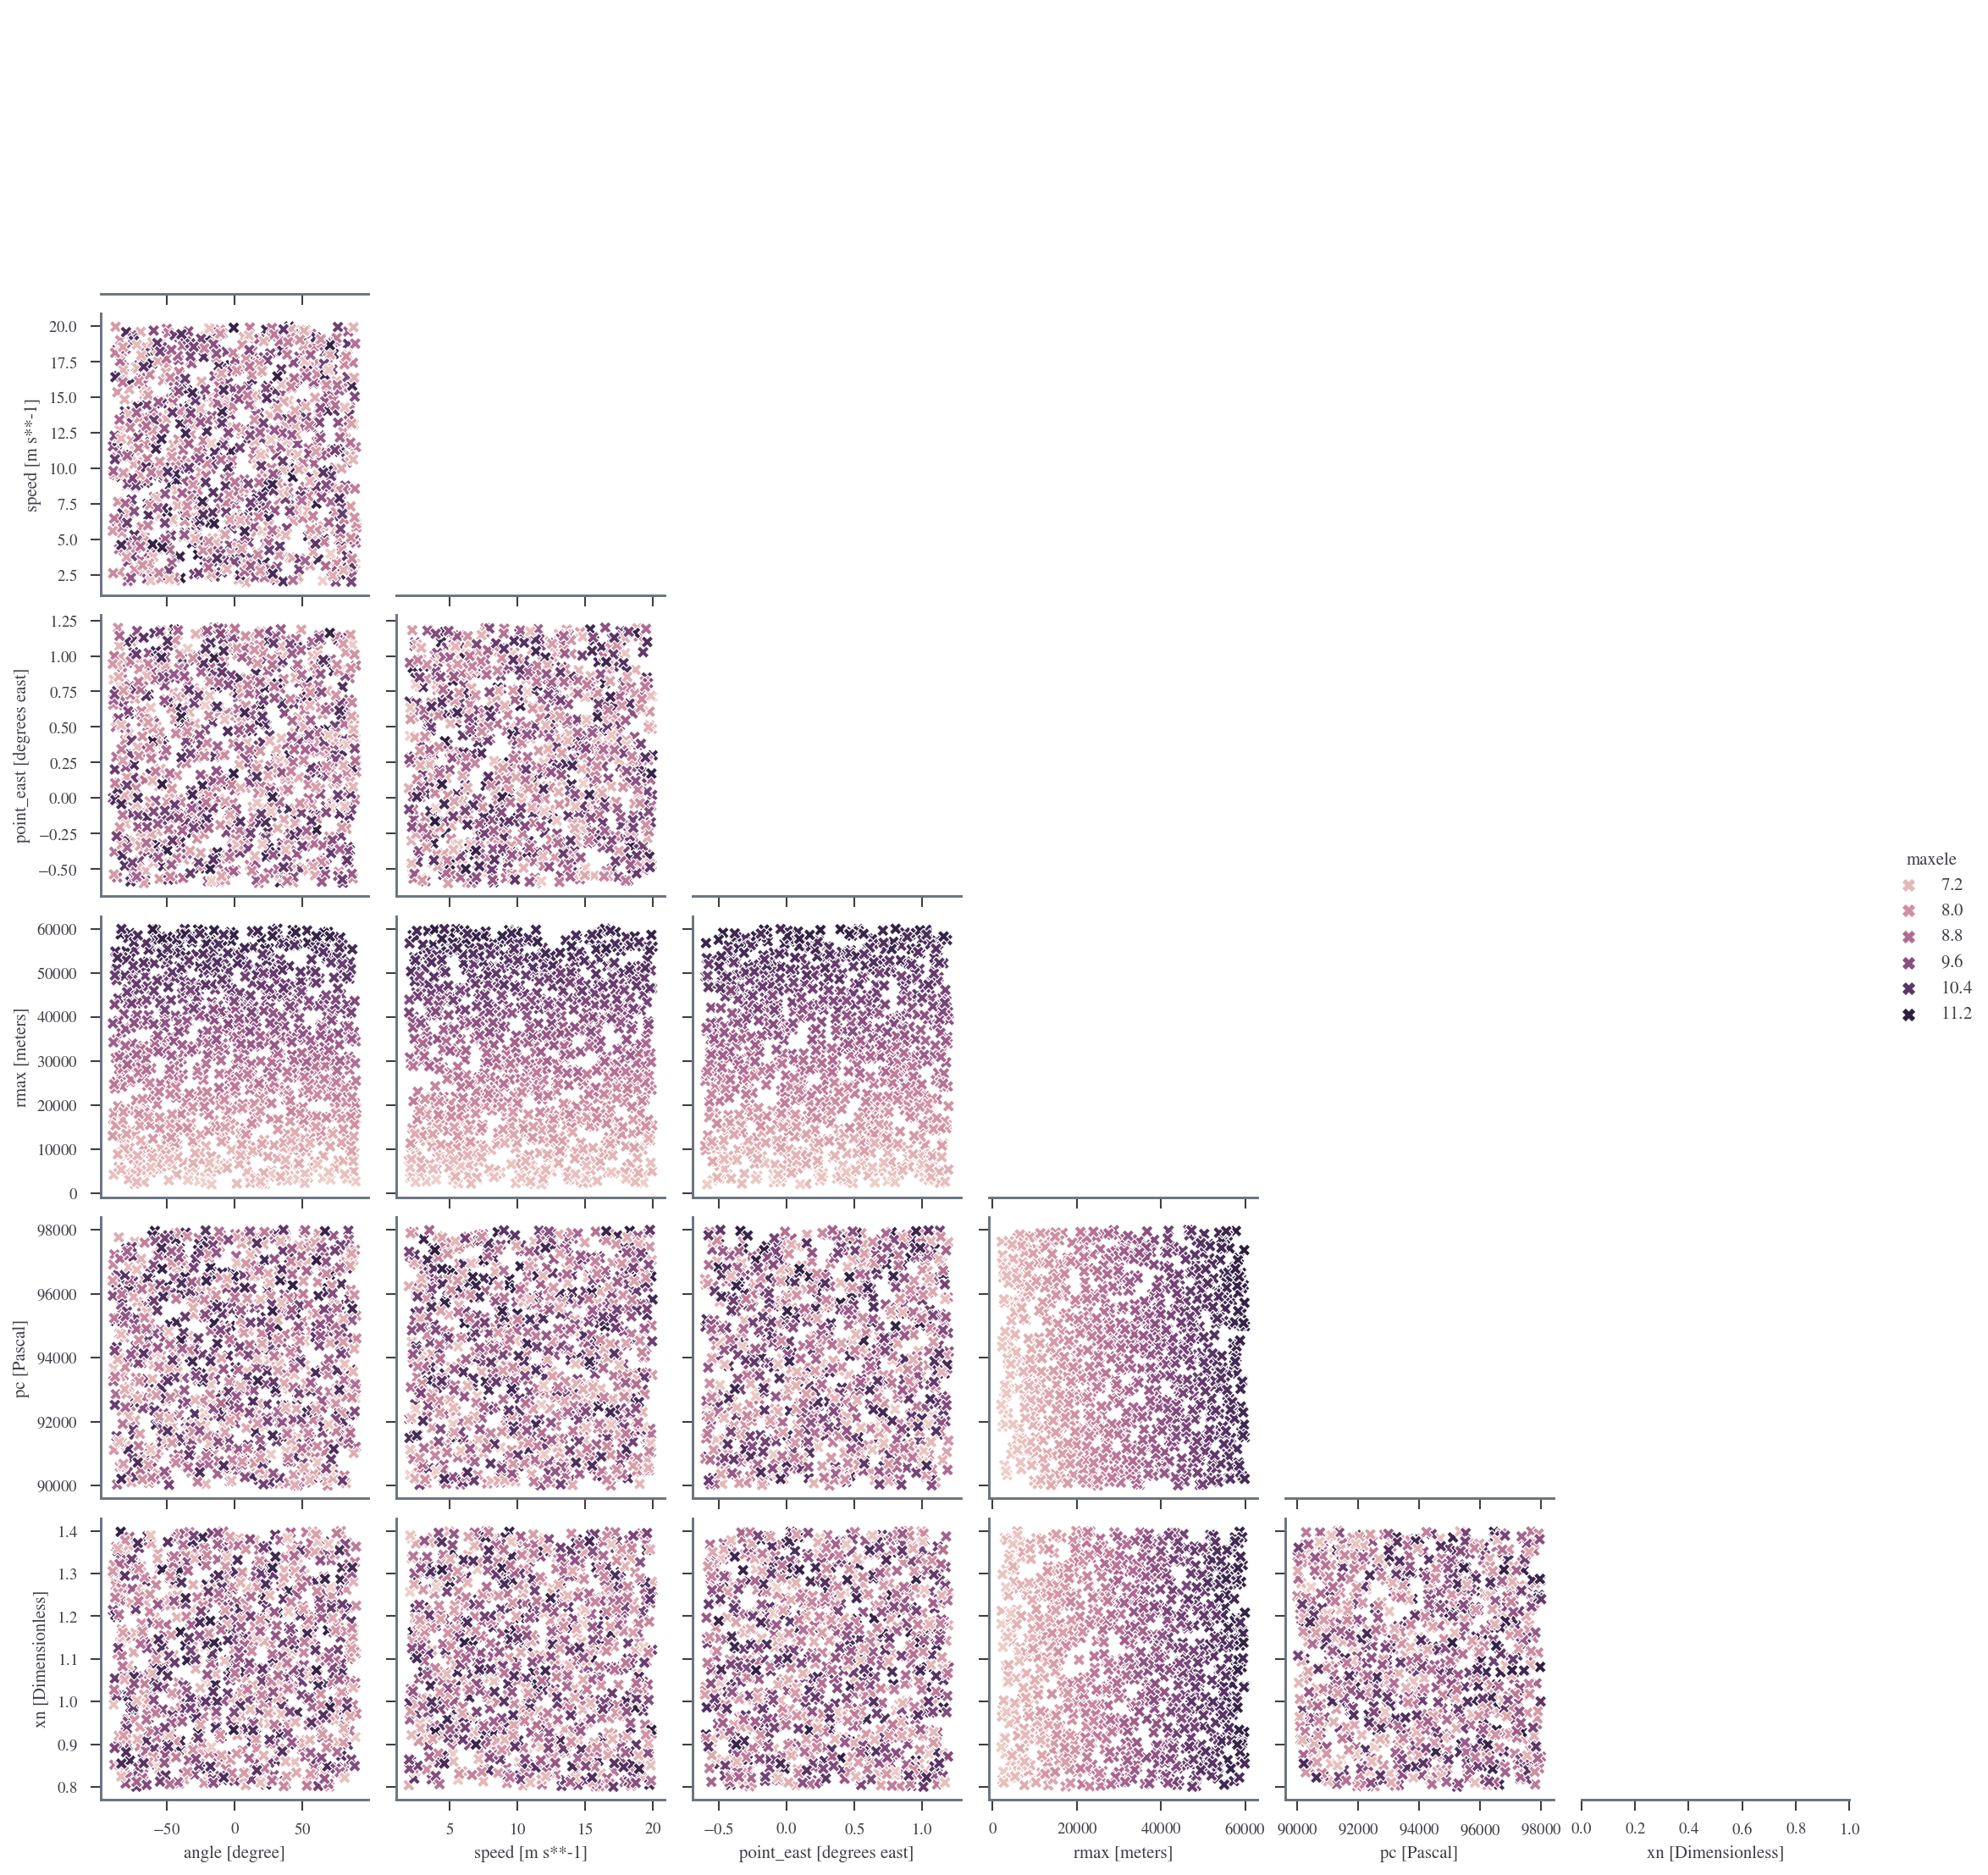

In [136]:
import seaborn as sns
sns.pairplot(df, hue="maxele", corner=True)

In [ ]:
tf  = SixDOFSearch(dryrun=True, path="TestHoldout6D", seed=100)
tf.run_initial(samples=1000)
tf.setup_active()
tf.save_initial_data()

Sweep, dryrun=True: 100%|██████████| 1000/1000 [00:00<00:00, 4938.76it/s]


## Implement verification curves: include WandB call?

In [2]:
import wandb

In [ ]:
wandb.init(project="6DTest", entity="sdat2")